In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

np.random.seed(0)

In [37]:
data = pd.read_csv('3-BasicCV0707C100.csv')
#data = pd.read_csv('BasicCVAllDatawhitoutpenalty-07071.csv')
#data = pd.read_csv('BasicCVAllDatawhitoutpenalty-07072.csv')
#data = pd.read_csv('2-BasicCV0107C1.csv')
data.columns = ['null','p', 'c', 'size', 'accTrain', 'accTest', 
                'f1Train', 'f1Test']
data = data[data['size']==1000]
data = data[data['p']<3]
data['model'] = 'LR('+data['p'].astype(str)+','+data['c'].astype(str)+')'
data.head()

FileNotFoundError: [Errno 2] File 3-BasicCV0707C100.csv does not exist: '3-BasicCV0707C100.csv'

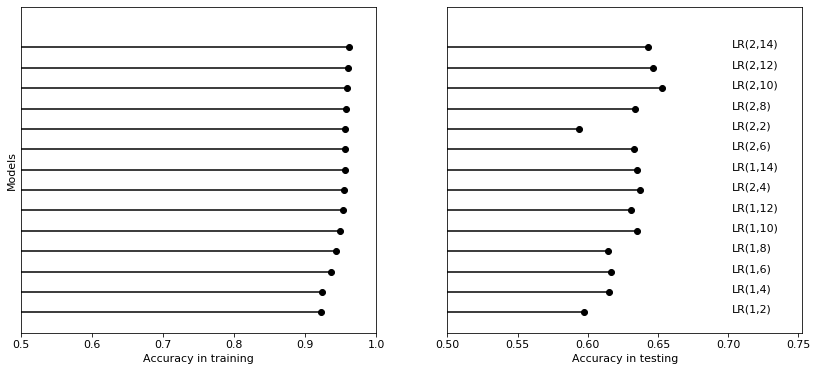

In [38]:
startLine = 0.5
ordered_df = data.sort_values(by=['accTrain'], ascending=True)
my_range=range(1,len(data.index)+1)
plt.figure(figsize=(14,6)) 
plt.subplot(1, 2, 1)
SMALL_SIZE = 11
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)

plt.hlines(y=my_range, xmin=startLine,
           xmax=ordered_df['accTrain'], color='black')
plt.plot(ordered_df['accTrain'], my_range, "o",color ='black')
plt.xlabel('Accuracy in training')
plt.ylabel('Models')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
plt.xlim(startLine, 1)

plt.subplot(1, 2, 2)
plt.hlines(y=my_range, xmin=startLine, 
           xmax=ordered_df['accTest'], color='black')
plt.plot(ordered_df['accTest'], my_range, "o", color ='black')
plt.xlabel('Accuracy in testing')
#plt.ylabel('Model')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
plt.xlim(startLine, ordered_df['accTest'].max()+0.1)
for j in range(ordered_df.shape[0]):
    #print(j)
    #print(ordered_df['model'].iloc[j])
    plt.annotate(ordered_df['model'].iloc[j], xy=(ordered_df['accTest'].max()+0.05, j+1), 
                 xytext=(ordered_df['accTest'].max()+0.05, j+1))

In [18]:
data = pd.read_csv('Informative_rrlyr1-0707.csv')
data.columns = ['a','b', 'c', 'd', 'e', 'f','g','h','i', 'j', 'l']


In [19]:
del data['f']
del data['g']

In [6]:
data = data[data['e']==1000]
data['model'] = 'BLR('+data['b'].astype(str)+','+data['c'].astype(str)+')'
data.head()

,a,b,c,d,e,h,i,j,l,model
0,0,1,2,-282.906394,1000,0.907,0.623127,0.907278,0.622718,"BLR(1,2)"
1,1,1,4,-133.706784,1000,0.973,0.633013,0.972864,0.637946,"BLR(1,4)"
2,2,1,6,-128.501418,1000,0.970,0.630114,0.970000,0.630617,"BLR(1,6)"
3,3,1,8,-116.469218,1000,0.980,0.628961,0.980040,0.613459,"BLR(1,8)"
4,4,1,10,-114.270318,1000,0.982,0.637834,0.982036,0.624507,"BLR(1,10)"


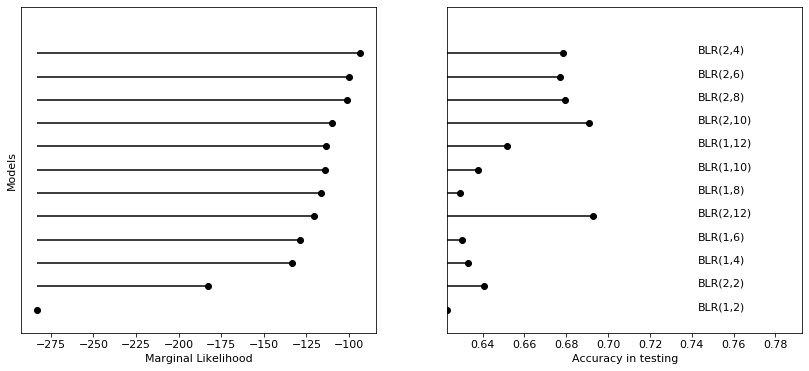

In [14]:
startLine = data['d'].min()
ordered_df = data.sort_values(by=['d'], ascending=True)
my_range=range(1,len(data.index)+1)
plt.figure(figsize=(14,6)) 
plt.subplot(1, 2, 1)
SMALL_SIZE = 11
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)

plt.hlines(y=my_range, xmin=startLine,
           xmax=ordered_df['d'], color='black')
plt.plot(ordered_df['d'], my_range, "o",color ='black')
plt.xlabel('Marginal Likelihood')
plt.ylabel('Models')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
#plt.xlim(startLine, 1)

plt.subplot(1, 2, 2)
plt.hlines(y=my_range, xmin=ordered_df['i'].min(), 
          xmax=ordered_df['i'], color='black')
plt.plot(ordered_df['i'], my_range, "o", color ='black')
plt.xlabel('Accuracy in testing')
#plt.ylabel('Model')
plt.ylim(0, len(data.index)+2)
plt.yticks([])
plt.xlim(ordered_df['i'].min(), ordered_df['i'].max()+0.1)
for j in range(ordered_df.shape[0]):
    #print(j)
    #print(ordered_df['model'].iloc[j])
    
    plt.annotate(ordered_df['model'].iloc[j], xy=(ordered_df['i'].max()+0.05, j+1), 
                 xytext=(ordered_df['i'].max()+0.05, j+1))